In [1]:
import xarray as xr

In [7]:
import matplotlib.pyplot as plt

In [2]:
def boxmean(da): 
    """
    Compute spatial weighted mean
    da      :  xarray DataArray
    """ 
    #weights = np.cos(np.deg2rad(da.lat)) 
    #weights.name = 'weights' 
    #boxmean = da.weighted(weights).mean(dim=('lat','lon')) 
    
    if hasattr(da, 'lat'):
        weights = np.cos(da.lat * np.pi / 180)
        boxmean = da.weighted(weights).mean(dim=('lat','lon')) 
    elif hasattr(da, 'latitude'):
        weights = np.cos(da.latitude * np.pi / 180)
        boxmean = da.weighted(weights).mean(dim=('latitude','longitude')) 
    
    return boxmean 

In [3]:
in1='/scratch/nklm/cmorisation/cmorised-results/EC-EARTH-AOGCM/h048/CMIP6/CMIP/KNMI/EC-Earth3/historical/r1i1p5f1/day/pet/gr/v20220601/pet_day_EC-Earth3_historical*.nc'
in2='/scratch/nklm/cmorisation/cmorised-results/EC-EARTH-AOGCM/s067/CMIP6/CMIP/KNMI/EC-Earth3/ssp245/r1i1p5f1/day/pet/gr/v20220601/pet_day_EC-Earth3_ssp245*.nc'

In [4]:
ds1=xr.open_mfdataset(in1)
ds2=xr.open_mfdataset(in2)

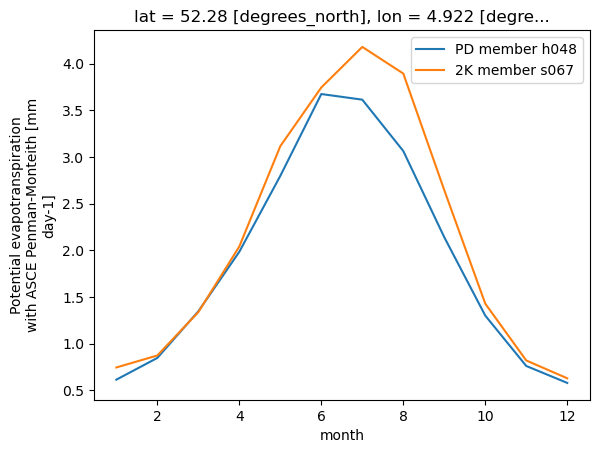

In [9]:
ds1.pet_pm_asce.sel(lat=52,lon=5,method='nearest').resample(time="M").mean().groupby('time.month').mean(dim='time').plot(label='PD member h048')
ds2.pet_pm_asce.sel(lat=52,lon=5,method='nearest').resample(time="M").mean().groupby('time.month').mean(dim='time').plot(label='2K member s067')
plt.legend()
plt.show()

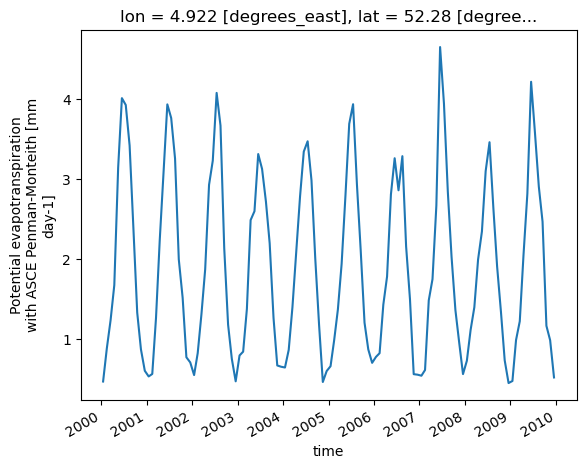

In [14]:
ds1.pet_pm_asce.sel(lat=52,lon=5,method='nearest').plot()